**Assignment 6: Probabilistic Reasoning (Given: 11 Apr 2023, Due: 23 Apr 2023)**


**General instructions**

* Solutions are to be typed in the `.ipynb` file provided and uploaded in the lab course page in Moodle on the due date. 
* Your code should be well commented and should be compatible with python3. You may use `collections`, `csv`, `re`, `numpy`,`matplotlib`, `math` modules. No other libraries may be imported. You may find `Counter` in `collections` useful.
* For a random variable `X` and a value `x` in its range, the event `X=x` will also be denoted by just `x` if the random variable is clear from the context.

In [1]:
#importing the necessary modules
import csv
from collections import Counter
import re
import math
import numpy as np
from matplotlib import pyplot as plt

# Spam Filter using Naive Bayes Classifier

You are given a collection of SMS text messages in `sms.csv` as a tab separated CSV file. The first column of this file tells whether the message is a spam or not spam and the second column gives the message. Assume that this dataset is labelled correctly as spam or not spam. We  will use this dataset as the training data to build a spam filter. 

(a) Analyze the dataset and identify top ten spam words and top ten non-spam words  and their frequency counts. Make sure that you first remove articles ("a", "and", "the") and <=4 letter propositions ("for", "off", "in", "from" and so on).  

In [4]:
#importing the csv module to read csv file
import csv

# define a function named "cleantext" that takes a string as input
def cleantext(string):
#     stopwords = ['', 'â', "you", "a", "and", "the", 'u','ur','4','1','2','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'wouldn']
    
    # Create a list of stopwords to be removed from the input string
    stopwords = ['', 'â', "you", 'a', "and", "the", 'u','ur','4','1','2','i', 'me', 'my', 'we', 'our', 'ours', 'you', 'your',
        'he', 'him', 'his',  'she', 'her', 'hers',  'it','its', 'they', 'them',  'what', 'who', 'whom', 'this', 'that', 
         'am', 'is', 'are', 'was', 'were', 'be', 'been',  'have', 'has', 'had',  'do', 'does', 'did',  'a', 'an', 'the', 
        'and', 'but', 'if', 'or',  'as',  'of', 'at', 'by', 'for', 'with', 'into', 'to', 'from', 'up', 'down', 'in', 'out', 
        'on', 'off', 'over',  'then', 'once', 'here', 'when','why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 
        'most',  'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 
        'can', 'will', 'just', 'don', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 'didn',  'hadn', 'hasn']
    string = string.replace("'s"," ")            #removing apostrophe s
    string = string.replace("''"," ")            #removing empty spaces
    string = string.lower()                      #to make the text lower
    re.sub('\s+',' ',string)
    s = re.split(r'\W+',string)                  #to remove punctuation and making the list of words
    s = [w for w in s if not w in stopwords]     # to remove the stopwords from the list 
    return s
with open('sms.csv', newline='') as file:        #to fetch the csv file
    reader = csv.reader(file, delimiter = '\t')  #separate columns
    sp=""                                        #to store the spam messages
    nsp=""                                       #to store the non spam messages
    total=""                                     #to store all messages
    c=0
    nospam=0
    nonspam = 0
    for row in reader:                           #loop for reading the row of csv file
        if(row[0]=='spam'):
            sp+=row[1]
            nospam+=1
        if(row[0]=='notspam'):
            nsp+=row[1]
            nonspam+=1
        total+=row[1]
        c+=1
    spam = cleantext(sp)                                    #making the string of spam words into list of words
    lensp = len(spam)
    nspam = cleantext(nsp)                                  #making the string of non spam words into list of words
    lennsp = len(nspam)
    spdict = Counter(spam)                                  #using the counter to make the dictionary of frequency of spam words
    topswords = Counter(spam).most_common(10)               #finding the top ten spam words
    print("top 10 spamming words are",topswords)
    nspdict = Counter(nspam)                                #using the counter to make the dictionary of frequency of non spam words
    topnswords = Counter(nspam).most_common(10)             #finding the top ten non spam words
    print("top 10 not spamming words are",topnswords)
    txt = cleantext(total)
    unique=[]                                        #list to store the unique words
    for i in txt:
        if i not in unique:
            unique.append(i)

top 10 spamming words are [('call', 339), ('free', 189), ('txt', 143), ('mobile', 122), ('claim', 113), ('text', 101), ('stop', 100), ('www', 96), ('reply', 93), ('prize', 90)]
top 10 not spamming words are [('lt', 315), ('gt', 315), ('get', 294), ('go', 241), ('ok', 228), ('got', 225), ('call', 225), ('know', 224), ('come', 224), ('like', 223)]
10096


(b) Let `W` be the random variable denoting a word and `T` be the random variable denoting a message's type (spam or non-spam). For each of the words `w` (spam or non-spam), estimate the likelihood probabilities (aka the conditional probabilities) `Pr(W = w | T=spam)` and `Pr(W=w | T=non-spam)` as two separate functions. Note  that in order to compute these likelihoods this, you need to compute how many times `w` appears in the corpus (spam or not spam) and the total number of words (including duplicates) in that corpus. If a word does not occur at all, then assign it a non-zero yet small probability fixed suitably. Note that the likelihoods `Pr(w | spam)` and `Pr(w | non-spam)` have to be estimated after suitably removing articles and propositions as done in (a). 

In [7]:
#function to find the probability of a word given spam
def probwspam(word):
    if word in spdict.keys():
        return spdict[word]/len(spam)
    else:
        return 1/len(txt)
#function to find the probability of a word given not spam
def probwnspam(word):
    if word in nspdict.keys():
        return nspdict[word]/len(nspam)
    else:
        return 1/len(txt)
#printing the probability of conditional probability of all unique words
for i in unique:
    print(f"the probability of word {i} given spam is {probwspam(i)}")
    print(f"the probability of word {i} given not spam is {probwnspam(i)}")

the probability of word go given spam is 0.0023440770196735037
the probability of word go given not spam is 0.006404464522986979
the probability of word until given spam is 0.0004185851820845542
the probability of word until given not spam is 0.0005580653733723094
the probability of word jurong given spam is 2.0155601241585035e-05
the probability of word jurong given not spam is 2.6574541589157588e-05
the probability of word point given spam is 2.0155601241585035e-05
the probability of word point given not spam is 0.00026574541589157585
the probability of word crazy given spam is 0.0004185851820845542
the probability of word crazy given not spam is 0.0002125963327132607
the probability of word available given spam is 0.00016743407283382168
the probability of word available given not spam is 0.0003986181238373638
the probability of word bugis given spam is 2.0155601241585035e-05
the probability of word bugis given not spam is 0.0001860217911241031
the probability of word n given spam is

the probability of word sleeping given not spam is 0.0005314908317831517
the probability of word ga given spam is 2.0155601241585035e-05
the probability of word ga given not spam is 2.6574541589157588e-05
the probability of word alter given spam is 2.0155601241585035e-05
the probability of word alter given not spam is 2.6574541589157588e-05
the probability of word dat given spam is 2.0155601241585035e-05
the probability of word dat given not spam is 0.0010629816635663034
the probability of word ericsson given spam is 2.0155601241585035e-05
the probability of word ericsson given not spam is 5.3149083178315176e-05
the probability of word oso given spam is 2.0155601241585035e-05
the probability of word oso given not spam is 0.0006112144565506245
the probability of word cannot given spam is 2.0155601241585035e-05
the probability of word cannot given not spam is 0.00013287270794578793
the probability of word oredi given spam is 2.0155601241585035e-05
the probability of word oredi given not 

the probability of word two given spam is 8.371703641691084e-05
the probability of word two given not spam is 0.0007972362476747276
the probability of word youdid given spam is 2.0155601241585035e-05
the probability of word youdid given not spam is 2.6574541589157588e-05
the probability of word sort given spam is 8.371703641691084e-05
the probability of word sort given not spam is 0.00023917087430241828
the probability of word dude given spam is 2.0155601241585035e-05
the probability of word dude given not spam is 0.00045176720701567896
the probability of word ive given spam is 2.0155601241585035e-05
the probability of word ive given not spam is 0.0001860217911241031
the probability of word lotta given spam is 2.0155601241585035e-05
the probability of word lotta given not spam is 2.6574541589157588e-05
the probability of word corvettes given spam is 2.0155601241585035e-05
the probability of word corvettes given not spam is 2.6574541589157588e-05
the probability of word latelycongratula

the probability of word mc given spam is 2.0155601241585035e-05
the probability of word mc given not spam is 2.6574541589157588e-05
the probability of word hun given spam is 2.0155601241585035e-05
the probability of word hun given not spam is 7.972362476747276e-05
the probability of word 2nite given spam is 0.00016743407283382168
the probability of word 2nite given not spam is 0.00015944724953494553
the probability of word every1 given spam is 2.0155601241585035e-05
the probability of word every1 given not spam is 2.6574541589157588e-05
the probability of word ava given spam is 2.0155601241585035e-05
the probability of word ava given not spam is 2.6574541589157588e-05
the probability of word goodtime given spam is 2.0155601241585035e-05
the probability of word goodtime given not spam is 2.6574541589157588e-05
the probability of word oli given spam is 2.0155601241585035e-05
the probability of word oli given not spam is 2.6574541589157588e-05
the probability of word rang given spam is 2.

the probability of word under given not spam is 0.00015944724953494553
the probability of word unknown given spam is 2.0155601241585035e-05
the probability of word unknown given not spam is 5.3149083178315176e-05
the probability of word album given spam is 2.0155601241585035e-05
the probability of word album given not spam is 5.3149083178315176e-05
the probability of word 121 given spam is 0.0002511511092507325
the probability of word 121 given not spam is 2.0155601241585035e-05
the probability of word 60p given spam is 0.0004185851820845542
the probability of word 60p given not spam is 2.0155601241585035e-05
the probability of word connect given spam is 0.00016743407283382168
the probability of word connect given not spam is 5.3149083178315176e-05
the probability of word 09094646899 given spam is 0.00016743407283382168
the probability of word 09094646899 given not spam is 2.0155601241585035e-05
the probability of word vu given spam is 0.00016743407283382168
the probability of word vu 

the probability of word sales given not spam is 5.3149083178315176e-05
the probability of word shifad given spam is 2.0155601241585035e-05
the probability of word shifad given not spam is 2.6574541589157588e-05
the probability of word raised given spam is 2.0155601241585035e-05
the probability of word raised given not spam is 2.6574541589157588e-05
the probability of word complaint given spam is 2.0155601241585035e-05
the probability of word complaint given not spam is 5.3149083178315176e-05
the probability of word doctors given spam is 2.0155601241585035e-05
the probability of word doctors given not spam is 2.6574541589157588e-05
the probability of word reminds given spam is 2.0155601241585035e-05
the probability of word reminds given not spam is 2.6574541589157588e-05
the probability of word lounge given spam is 8.371703641691084e-05
the probability of word lounge given not spam is 5.3149083178315176e-05
the probability of word lk given spam is 2.0155601241585035e-05
the probability 

the probability of word explicitly given spam is 2.0155601241585035e-05
the probability of word explicitly given not spam is 2.6574541589157588e-05
the probability of word nora given spam is 2.0155601241585035e-05
the probability of word nora given not spam is 2.6574541589157588e-05
the probability of word botherhe given spam is 2.0155601241585035e-05
the probability of word botherhe given not spam is 2.6574541589157588e-05
the probability of word gayle given spam is 2.0155601241585035e-05
the probability of word gayle given not spam is 2.6574541589157588e-05
the probability of word ishouse given spam is 2.0155601241585035e-05
the probability of word ishouse given not spam is 2.6574541589157588e-05
the probability of word crucify given spam is 2.0155601241585035e-05
the probability of word crucify given not spam is 2.6574541589157588e-05
the probability of word moved given spam is 2.0155601241585035e-05
the probability of word moved given not spam is 7.972362476747276e-05
the probabili

the probability of word gower given spam is 2.0155601241585035e-05
the probability of word gower given not spam is 2.6574541589157588e-05
the probability of word morrow given spam is 2.0155601241585035e-05
the probability of word morrow given not spam is 2.6574541589157588e-05
the probability of word chik given spam is 8.371703641691084e-05
the probability of word chik given not spam is 2.0155601241585035e-05
the probability of word filthy given spam is 8.371703641691084e-05
the probability of word filthy given not spam is 2.0155601241585035e-05
the probability of word filth given spam is 8.371703641691084e-05
the probability of word filth given not spam is 2.0155601241585035e-05
the probability of word 69669 given spam is 0.00016743407283382168
the probability of word 69669 given not spam is 2.0155601241585035e-05
the probability of word saristar given spam is 8.371703641691084e-05
the probability of word saristar given not spam is 2.0155601241585035e-05
the probability of word e14 gi

the probability of word galileo given not spam is 5.3149083178315176e-05
the probability of word atoh given spam is 2.0155601241585035e-05
the probability of word atoh given not spam is 2.6574541589157588e-05
the probability of word firmware given spam is 2.0155601241585035e-05
the probability of word firmware given not spam is 2.6574541589157588e-05
the probability of word helpthese given spam is 2.0155601241585035e-05
the probability of word helpthese given not spam is 2.6574541589157588e-05
the probability of word morphinehow given spam is 2.0155601241585035e-05
the probability of word morphinehow given not spam is 2.6574541589157588e-05
the probability of word wordscaptain given spam is 2.0155601241585035e-05
the probability of word wordscaptain given not spam is 2.6574541589157588e-05
the probability of word vijaykanth given spam is 2.0155601241585035e-05
the probability of word vijaykanth given not spam is 2.6574541589157588e-05
the probability of word captain given spam is 2.015

the probability of word disappointment given not spam is 2.6574541589157588e-05
the probability of word irritation given spam is 2.0155601241585035e-05
the probability of word irritation given not spam is 2.6574541589157588e-05
the probability of word itwhat given spam is 2.0155601241585035e-05
the probability of word itwhat given not spam is 2.6574541589157588e-05
the probability of word tantrum given spam is 2.0155601241585035e-05
the probability of word tantrum given not spam is 2.6574541589157588e-05
the probability of word pointcompliments given spam is 2.0155601241585035e-05
the probability of word pointcompliments given not spam is 2.6574541589157588e-05
the probability of word adventuringhey given spam is 2.0155601241585035e-05
the probability of word adventuringhey given not spam is 2.6574541589157588e-05
the probability of word chief given spam is 2.0155601241585035e-05
the probability of word chief given not spam is 2.6574541589157588e-05
the probability of word royal given 

(c) Let `M` be the random variable denoting a message (consisting of multiple words). Using the likelihood probabilities calculated in (b), implement a classifier that takes in a new SMS message `m=w1 w2 ... wi` and checks if it is spam or not using the naive Bayes' assumption. That is, compute `P(T=spam | M=m)` and `P(T=non-spam | M=m)` assuming that `P(m | spam) = P(w1 | spam) x P(w2 | spam) x ... x P(wi | spam)` and use this computation to decide if `m` is spam or not. 

In [38]:
m = input()                                 #taking a message as input
#function to made the naive bayes classifier
def NBC(m):
    l = cleantext(m)
    pmspam=1
    pmnspam=1
    for i in l:
        pmspam*=probwspam(i)                #finding the probability of message given spam
        pmnspam*=probwnspam(i)              #finding the probabilty of message given not spam
    pspam = nospam/c
    pnspam = nonspam/c
    pspamm = (pspam*pmspam)/((pspam*pmspam)+(pnspam*pmnspam))       #finding the probability of spam given message
    pnspamm = (pnspam*pmnspam)/((pspam*pmspam)+(pnspam*pmnspam))    #finding the probability of not spam given message
    if pspamm>pnspamm:
        print("prediction is the message is spam")
    else:
        print("prediction is the message is not spam")
NBC(m)

U dun say so early hor... U c already then say...
prediction is the message is not spam


(d) Test your classifier against 4-5 SMS messages (spam as well as non-spam) that you have received in your mobile phone.

In [9]:
#list of 4-5 sms 
SMS = ["Dear User, you've got My11Circle for your participation on Specials. Use code Get Flat 5000 bonus cash on https://t.jio/winnings-MYIPL5K T&C",
      "Welcome to Jio-Kerala. Kindly enable Data Roaming to use data services. Data, Voice & SMS benefits will be as per your plan.",
      "Hi Customer, You're pre-qualified for Axis Bank Credit Card. Get upto 20% off across 3K+ outlets. T&C Apply. Apply now! http://1kx.in/caB4ap -IndiaLends",
       "Welcome to Jio-AP & Telangana. Kindly enable Data Roaming to use data services. Data, Voice & SMS benefits will be as per your plan.",
      "You’ve earned Fastrack Flat 33% off on Sunglasses and Spectacles on Special. Click on https://t.jio/winnings-FAS33 to claim your coupon! T&C"]
for i in SMS:
    NBC(i)          #classifing the message as spam or not spam

prediction is the message is spam
prediction is the message is not spam
prediction is the message is spam
prediction is the message is spam
prediction is the message is spam


# Binary Town Naive Bayes Classifier  

Consider a town that contains only kids and adults. Each person in this town is associated with two attributes, height and weight that take on values from $\mathbb{R}$. Assume that the attributes height and weight are conditionally independent given the category (adult or kid). Let $X$ be the random variable denoting a pair of height-weight values and $Y$ be the random variable denoting a person in this town. Let $X_1$ and $X_2$ denote the random variables that take as values $x_1$ and $x_2$ when $X=(x_1,x_2)$.  Assume that $Y$ is a binary random variable that takes on values $kid=0$ or $adult=1$ depending on whether the person is a kid or an adult. The probability that a random person in this town is a kid is given by $P(Y=kid)=pKid$ and the probability that a random person in this town is an adult is given by $P(Y=adult)=pAdult=1-pKid$.

The conditional probability of height and weight given that a person is a kid or adult is given as follows. For $x=(x_1,x_2) \in \mathbb{R}^2$ with $x_1$ denoting the height and $x_2$ denoting the weight,

*   $P(X_1=x_1 ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1)$ and $P(X_2=x_2 ~|~ Y=kid)=f_{\mu_{12},\sigma_{12}}(x_2)$
*   $P(X_1=x_1 ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1)$ and $P(X_2=x_2 ~|~ Y=adult)=f_{\mu_{22},\sigma_{22}}(x_2)$
 
where $f_{\mu,\sigma}(z)=\frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \left( \frac{z-\mu}{\sigma} \right)^2}$. As height and weight are conditionally independent given the category, it follows that $P(X=x ~|~ Y=kid)=f_{\mu_{11},\sigma_{11}}(x_1) f_{\mu_{12},\sigma_{12}}(x_2)$ and $P(X=x ~|~ Y=adult)=f_{\mu_{21},\sigma_{21}}(x_1) f_{\mu_{22},\sigma_{22}}(x_2)$.


(a) Simulate 1000 people in this town assuming $pKid=.3$, $\sigma_{11}=\sigma_{21}=1$, $\sigma_{12}=\sigma_{22}=10$, $\mu_{11}=2.7,\mu_{12}=20,\mu_{21}=5,\mu_{22}=43$. Note that you may have to discard a  sample $(x_1,x_2)$ if either $x_1 <0$ or $x_2 <0$. Plot the bar chart of the valid samples, the histogram of heights across the groups, the histogram of weights across the groups and the scatter plot of the samples (height in the X-axis and weight in the Y-axis). 

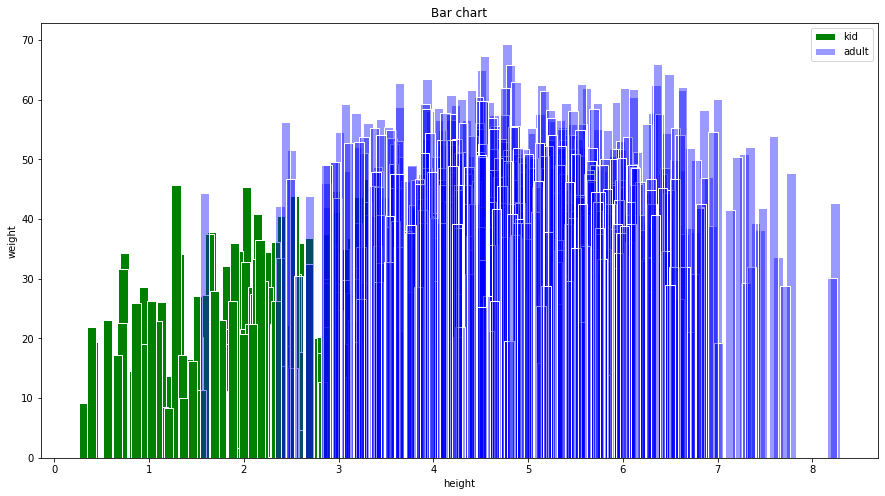

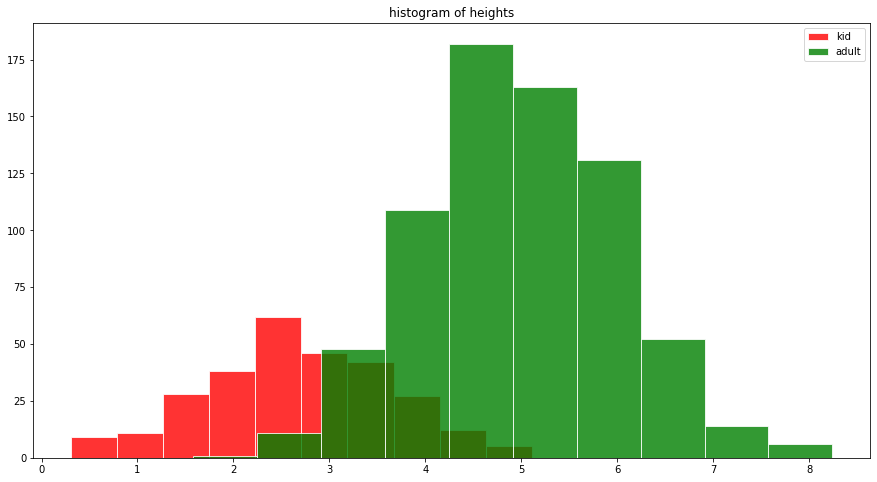

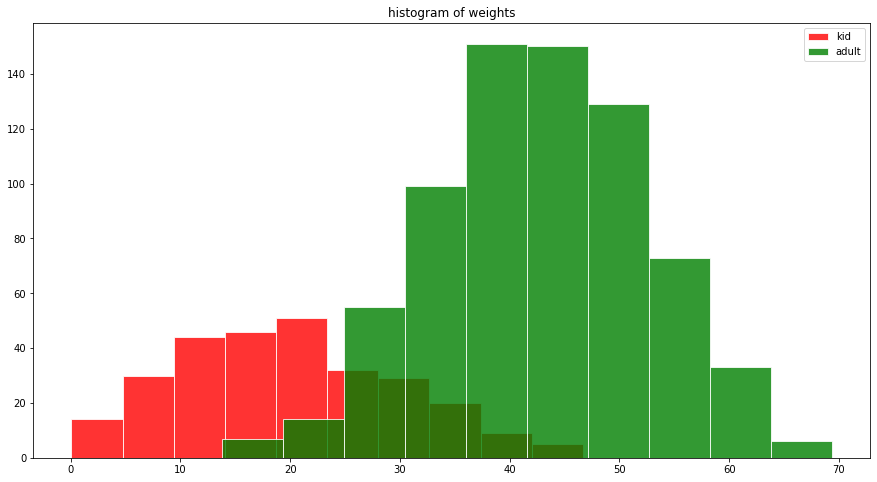

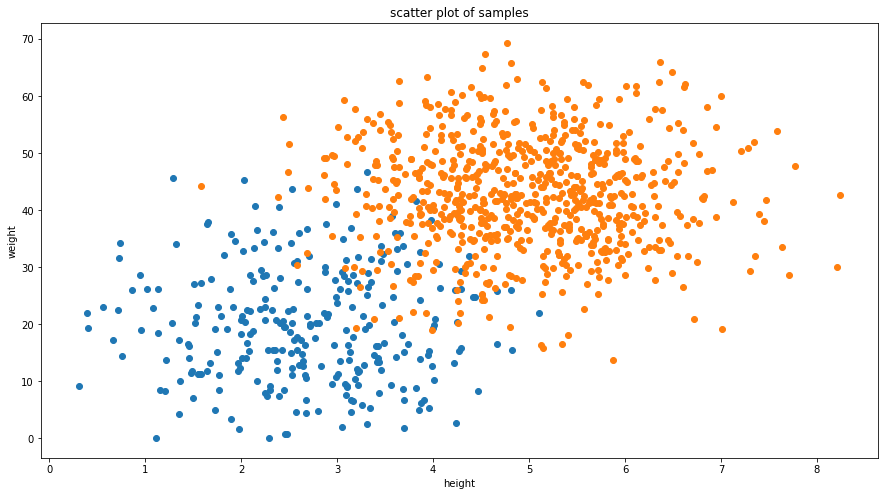

In [26]:
person = np.random.choice([0,1],1000,p=[0.3,0.7])       #generating 1000 persons according to given probability
hkid=[]                                          #list to store the heights of kid
wkid=[]                                          #list to store the weights of kid
hadult=[]                                        #list to store the heights of adult
wadult=[]                                        #list to store the weights of adult
height=[]                                        #list to store the heights of persons
weight=[]                                        #list to store the weights of persons
ppl=[]       
for i in person:
    if i==0:                                     #for kids
        h = np.random.normal(2.7,1,1)[0]
        w = np.random.normal(20,10,1)[0]
        if h<0 or w<0:                           #removing the negative samples
            continue
        else:
            hkid.append(h)
            wkid.append(w)
            height.append(h)
            weight.append(w)
            ppl.append(0)
    else:                                        #for adults
        h = np.random.normal(5,1,1)[0]
        w = np.random.normal(43,10,1)[0]
        if h<0 or w<0:                           #removing the negative samples
            continue
        else:
            hadult.append(h)
            wadult.append(w)
            height.append(h)
            weight.append(w)
            ppl.append(1)
            
#plotting the bar chart of samples 
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.bar(hkid,wkid,color = 'green',width = .1, edgecolor= "white",label = 'kid')
plt.bar(hadult,wadult,fc=(0,0,1,0.4) , width = .1,  edgecolor= "white",label = 'adult')
plt.title('Bar chart')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

#plotting the histogram of heights
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.hist(hkid,alpha=.8,color='red',label='kid',edgecolor='white')
plt.hist(hadult,alpha=.8,color='green',label='adult',edgecolor='white')
plt.title('histogram of heights')
plt.legend()
plt.show()

#plotting the histogram of weights
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.hist(wkid,alpha=.8,color='red',label='kid',edgecolor='white')
plt.hist(wadult,alpha=.8,color='green',label='adult',edgecolor='white')
plt.title('histogram of weights')
plt.legend()
plt.show()

#plotting the scatter plot between heights and weights
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.scatter(hkid,wkid)
plt.scatter(hadult,wadult)
plt.title('scatter plot of samples')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

(b) Implement an agent that observes the 1000 samples generated in part (a) and computes the fraction $pK$ of kids. Observe that $pK$ is an estimate on $pKid$. Compute the mean and standard deviation of heights and weights for samples that are kids. These values $\mu'_{11},\sigma'_{11},\mu'_{12}$ and $\sigma'_{12}$ are the estimates for $\mu_{11},\sigma_{11},\mu_{12}$ and $\sigma_{12}$. Compute similar estimates $\mu'_{21},\sigma'_{21},\mu'_{22}$ and $\sigma'_{22}$ for $\mu_{21},\sigma_{21},\mu_{22}$ and $\sigma_{22}$.



In [30]:
#function to calculate the estimated probability of person is kid
def probk(person):
    count=0
    for i in person:
        if i==0:
            count+=1
    return count/len(person)
#function to calculate the estimated mean
def mean(lst):
    s=0
    for i in lst:
        s += i
    return s/len(lst)
#function to calculate the estimated standard deviation
def sdeviation(l,mu):
    s=0
    for i in l:
        s+=i**2
    return (s/len(l) - mu**2)**0.5
pK = probk(person)
print(f"estimate of pKid is {pK}")
mu11 = mean(hkid)
mu12 = mean(wkid)
print(f"estimated value of mean of height of kid is {mu11}")
print(f"estimated value of mean of weight of kid is {mu12}")
sigma11 = sdeviation(hkid,mu11)
sigma12 = sdeviation(wkid,mu12)
print(f"estimated standard deviation of height of kid is {sigma11}")
print(f"estimated standard deviation of weight of kid is {sigma12}")
mu21 = mean(hadult)
mu22 = mean(wadult)
print(f"estimated value of mean of height of adult is {mu21}")
print(f"estimated value of mean of weight of adult is {mu22}")
sigma21 = sdeviation(hadult,mu21)
sigma22 = sdeviation(wadult,mu22)
print(f"estimated standard deviation of height of adult is {sigma21}")
print(f"estimated standard deviation of weight of adult is {sigma22}")

estimate of pKid is 0.283
estimated value of mean of height of kid is 2.682265250996169
estimated value of mean of weight of kid is 19.88531059301585
estimated standard deviation of height of kid is 0.9439568670957544
estimated standard deviation of weight of kid is 10.058885513792356
estimated value of mean of height of adult is 4.971745191863635
estimated value of mean of weight of adult is 42.79248608097178
estimated standard deviation of height of adult is 1.0138728018694516
estimated standard deviation of weight of adult is 9.598424587508918


(c) Implement an agent that classifies each sample generated in part (a) as kid or adult using the estimates computed in part (b) and Bayes' Rule. That is, the classification of a person with attributes $x=(x_1,x_2)$ into $adult$ or $kid$ is based on the values $pK \cdot f_{\mu'_{11},\sigma'_{11}}(x_1) f_{\mu'_{12},\sigma'_{12}}(x_2)$ and $(1-pK) \cdot f_{\mu'_{21},\sigma'_{21}}(x_1) f_{\mu'_{22},\sigma'_{22}}(x_2)$. Measure the accuracy of the classifier. Give the scatter plot of the 1000 samples (height in the X-axis and weight in the Y-axis) by coloring the correctly classified ones in one color and the others in another color. 





accuracy of the agent is 0.945


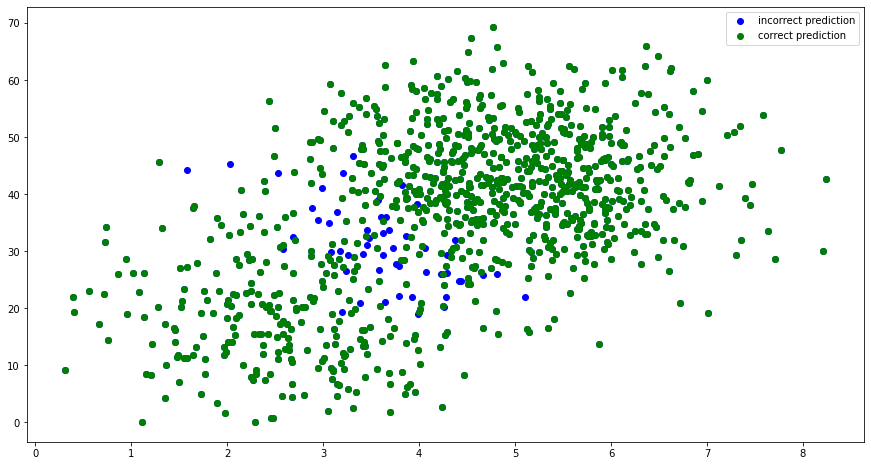

In [36]:
#function to calculate the probability density function value
def func(x,mu,sigma):
    prob_density = (np.pi*sigma) * np.exp(-0.5*((x-mu)/sigma)**2)
    return prob_density
#defining the list to store the various values
kidh=[]
kidw=[]
adulth=[]
adultw=[]
cheight=[]
cweight=[]
accuracy=0
for i in range(len(height)):
    #calculating the total probability
    pt = pK*func(height[i],mu11,sigma11)*func(weight[i],mu12,sigma12) + (1-pK)*func(height[i],mu21,sigma21)*func(weight[i],mu22,sigma22)
    #calculating the probability of kid given sample
    pkidx = (pK*func(height[i],mu11,sigma11)*func(weight[i],mu12,sigma12))/pt
    #calculating the probability of adult given sample
    padultx = ((1-pK)*func(height[i],mu21,sigma21)*func(weight[i],mu22,sigma22))/pt
    if pkidx>padultx:
        if ppl[i]==0:
            accuracy+=1                   #calculating the accuracy
            cheight.append(height[i])
            cweight.append(weight[i])
        kidh.append(height[i])
        kidw.append(weight[i])
    else:
        if ppl[i]==1:
            accuracy+=1                   #calculating the accuracy
            cheight.append(height[i])
            cweight.append(weight[i])
        adulth.append(height[i])
        adultw.append(weight[i])
print(f"accuracy of the agent is {accuracy/1000}")
#plotting the scatter plot of incorrect and correct samples
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.scatter(height,weight,color='blue',label='incorrect prediction')
plt.scatter(cheight,cweight,color='green',marker='o',label='correct prediction')
plt.legend()
plt.show()

# Inferences from Bayes Net (Optional/Bonus)

In this assignment, we will consider Bayes nets that represent only Boolean variables. Given a text file containing the description of a Bayes net and another text file containing queries on the Bayes net, write a program that will answer these queries. You have to implement two techniques for drawing inference from a Bayes net.


*   Exact inference using variable elimination - implement the following functions (i) reduce – retains only those entries in the factor that support the evidences (ii) join – joins two factors (iii) sum– sums out a variable from the factor (iv) normalize – normalizes the factor
* Approximate inference using rejection sampling - write a function that selects the value for a variable from a given probability distribution.

**Description of a Bayes net** - given as a text file in the following format.

$N$

$X_1$ parents of $X_1$ separated by space

Conditional probability table

$X_2$ parents of $X_2$ separated by space

Conditional probability table

...

The first line indicates the number of random variables in the network. Every pair of subsequent consecutive lines give details about a variable, its parents and the conditional probability table. Consider the following example of an input file. 

3

1 2

0.8 0.2

0.4 0.6

3

0.2 0.8

2

0.6 0.4


Here, the first line says that there are three random variables in the network. The second line says that the random variable $X_1$ has a single parent $X_2$. The third line says that P($X_1$=true | $X_2$=true) = 0.8 and P($X_1$=false | $X_2$=true) = 0.2. The fourth line says that P($X_1$=true | $X_2$=false) = 0.4 and P($X_1$=false | $X_2$=false) = 0.6. The next two line say that the random variable $X_3$ has no parents and P($X_3$=true) = 0.2, P($X_3$=false) = 0.8. The next two lines say that the random variable $X_2$ has no parents, P($X_2$=true) = 0.6, P($X_2$=false) = 0.4. 

**Description of the Queries** - given as a text file with each line in the following format

`technique` `q` `query variables` `e` `evidence variables` 

where the query/evidence variables are separated by space. For example, if we want to use `variable elimination` to estimate P($X_1$=true,$X_2$=true | $X_3$=false), then the query line is
`ve q 1 2 e ~3`. Similarly, if we want to perform the same inference using rejection sampling, then the query is `rs q 1 2 e ~3`. Here, `~` denotes negation. 

**Output** - the output to the queries should be provided in a separate file. For simplicity, assume that in each query, we are only interested in obtaining the probability values instead of the distribution. That is, the output is a probability value, one per line, for every query.

Also, investigate the convergence of the probabilities estimated from rejection sampling as a function of the number of  samples generated.  